# Benford  for Python

### Current version: 0.4.3

# Installation

### Benford for python is a Package in PyPi, so you can install with *pip*:
##### `$ pip install benford_py`
### or
##### `$ pip install benford-py`

### Or you can cd into the site-packages subfolder of your python distribution (or environment) and clone from there:
##### `$ git clone http://github.com/milcent/benford_py.git`

## [Documentation](https://benford-py.readthedocs.io)

# Demo

### This demo assumes you have (at least) some familiarity with Benford's Law.

### First let's import some libraries and the benford module.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

In [2]:
import benford as bf

### Quick start

#### Getting some public data with pandas, the S&P500 EFT quotes, up until Dec 2016.
##### I have downloaded it and saved it in the data folder, so you should have it if you cloned the repo. Alternatively, you an downolad it [here](https://github.com/milcent/benford_py/blob/master/data/SPY.csv).

In [3]:
sp = pd.read_csv('data/SPY.csv', index_col='Date', parse_dates=True)

#### Creating simple and log return  columns

In [4]:
#adding '_' to facilitate handling the column
sp.rename(columns={'Adj Close':'Adj_Close'}, inplace=True) 
sp['p_r'] = sp.Close/sp.Close.shift()-1        #simple returns
sp['l_r'] = np.log(sp.Close/sp.Close.shift())  #log returns
sp.tail()

,Open,High,Low,Close,Volume,Adj_Close,p_r,l_r
Date,,,,,,,,
2016-12-23,225.429993,225.720001,225.210007,225.710007,36251400,225.710007,0.001464,0.001463
2016-12-27,226.020004,226.729996,226.000000,226.270004,41054400,226.270004,0.002481,0.002478
2016-12-28,226.570007,226.589996,224.270004,224.399994,59776300,224.399994,-0.008265,-0.008299
2016-12-29,224.479996,224.889999,223.839996,224.350006,47719500,224.350006,-0.000223,-0.000223
2016-12-30,224.729996,224.830002,222.729996,223.529999,101301800,223.529999,-0.003655,-0.003662


### First Digits Test

### Let us see if the SPY log returns look like Benford.
#### The `first_digits` function's first argument is the data to be analysed, which may be a pandas Series or a numpy 1D array.
#### The `digs` argument tells the function which test to run: 1 for the _first_, 2 for the _first two_, and 3 for the _first three_ digits.The `decimals` parameter tells the function how many decimal places to consider when pre-processing the data. It defaults to 2, for dealing with currency, but since here we are dealing with tiny numbers, we will go with 8.


Initialized sequence with 5968 registries.

Test performed on 5968 registries.
Discarded 0 records < 1 after preparation.


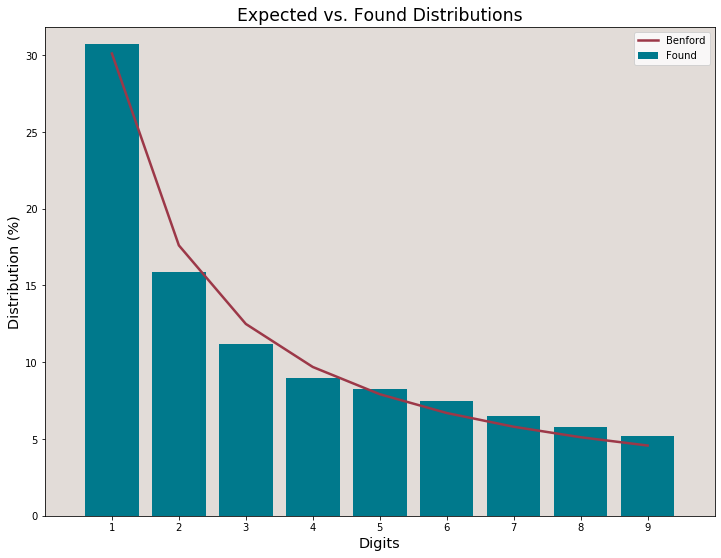

In [5]:
f1d = bf.first_digits(sp.l_r, digs=1, decimals=8) # digs=1 for the first digit (1-9)

#### The *first_digits* function draws the plot (default) with blue bars fot the digits found frequencies and a red line corresponding to the expected Benford proportions. 
#### It also returns a pandas DataFrame object with Counts, Found proportions and Expected values for each digit in the data studied.
#### Zeros and NANs are dropped before processing.
#### By default, (`verbose`=True) it also gives informaiton on the sample size and on the number of records eventually discarded during pre-processing (more on this later) .

In [6]:
f1d

,Counts,Found,Expected
First_1_Dig,,,
1,1835,0.307473,0.301030
2,949,0.159015,0.176091
3,668,0.111930,0.124939
4,534,0.089477,0.096910
5,494,0.082775,0.079181
6,447,0.074899,0.066947
7,386,0.064678,0.057992
8,345,0.057808,0.051153
9,310,0.051944,0.045757


### First Two Digists


Initialized sequence with 5968 registries.

Test performed on 5968 registries.
Discarded 0 records < 10 after preparation.


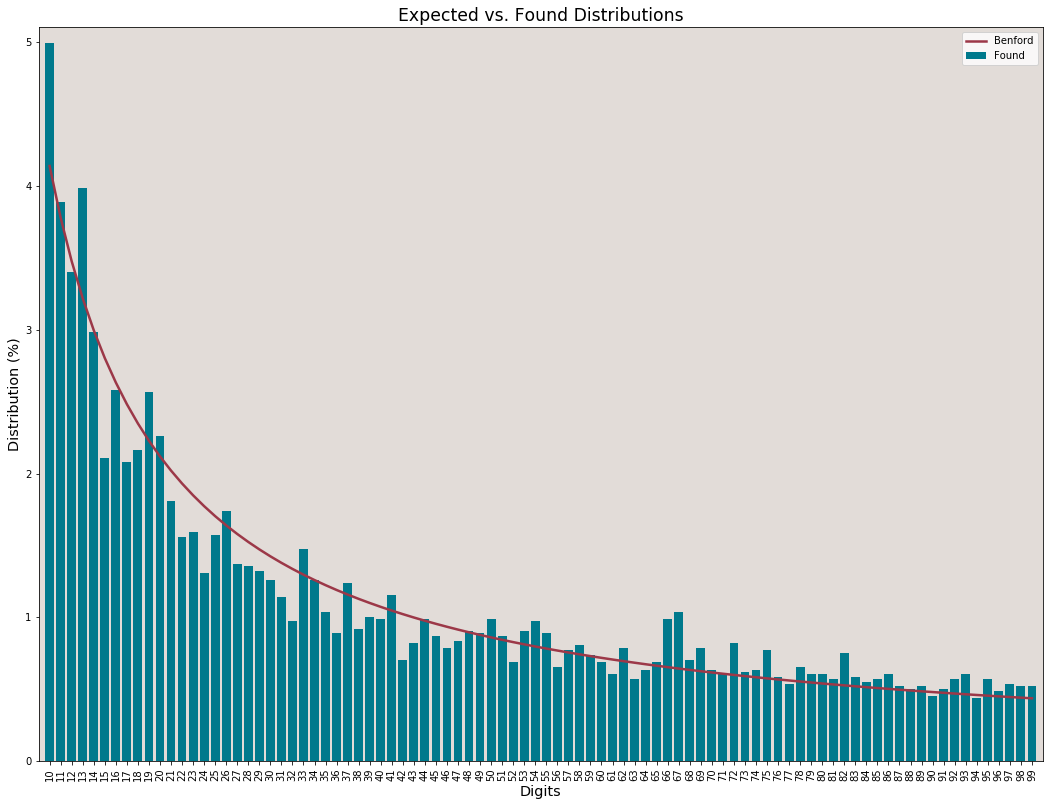

In [7]:
f2d = bf.first_digits(sp.l_r, digs=2, decimals=8) # Note the parameter digs=2!

#### The variable `f2d` is assigned a pandas DataFrame with the Counts of registries with the digitss of interest, in this case 10-99 (First Two), the Found proportions and the Expected, Benfors ones, as shown bellow.

In [8]:
f2d.head()

,Counts,Found,Expected
First_2_Dig,,,
10,298,0.049933,0.041393
11,232,0.038874,0.037789
12,203,0.034015,0.034762
13,238,0.039879,0.032185
14,178,0.029826,0.029963


In [9]:
f2d.tail()

,Counts,Found,Expected
First_2_Dig,,,
95,34,0.005697,0.004548
96,29,0.004859,0.004501
97,32,0.005362,0.004454
98,31,0.005194,0.004409
99,31,0.005194,0.004365


## Assessing conformity

#### There are some conformity tests to evaluate if the data studied is a good fit to Benford's Law. Let us not confuse conformity tests with the digits tests themselves. The latter are the First Digit Test, Second Digit Test, First Two Digits Tests, and so on, ie, the result of processing the data and finding the respective position digits, whilst the former are statistical tests applied to the results of the latter and compared to critical values to establish conformity or not with Benford's Law.
#### These conformity tests cam be divided for didatic purposes in:
- #### Tests which result in a single (scalar) statistic about the whole sample. Some examples are:
    - #### the **Chi-Square** test;
    - #### the **Kolmogorov-Smirnov** test;
    - #### the Mean Absolute Deviation (**MAD**) test; and
- #### Tests that render one statistic for each of the studied leading digits' proportions in relation to the expexted Benford's ones. That's the case of the **Z statistic** for the proportions. We will start with this one.

#### There is one more way to divide such tests:
- #### Those which depend on the confidence level and on the number of records in the sample:
    - #### the **Kolmogorov-Smirnov** test; and
    - #### the **Z statistic** for the proportions.
- #### Those which do not:
    - #### the **Chi-Square** test; and
    - #### The Mean Absolute Deviation (**MAD**) test.

#### As mentioned, the Z scores test needs a confidence level so as to set a threshold for the deviations to be deemed relevant (above it) or not (below it). In the digits functions, you can turn it on by setting the parameter `confidence`, which will tell the function which confidence level to consider after calculating the Z score for each proportion.


Initialized sequence with 5968 registries.

Test performed on 5968 registries.
Discarded 0 records < 10 after preparation.

The entries with the significant positive deviations are:

             Expected     Found   Z_score
First_2_Dig                              
67           0.006434  0.010389  3.740056
13           0.032185  0.039879  3.331418
10           0.041393  0.049933  3.279619
66           0.006531  0.009886  3.137524
82           0.005264  0.007540  2.340301
72           0.005990  0.008210  2.138736


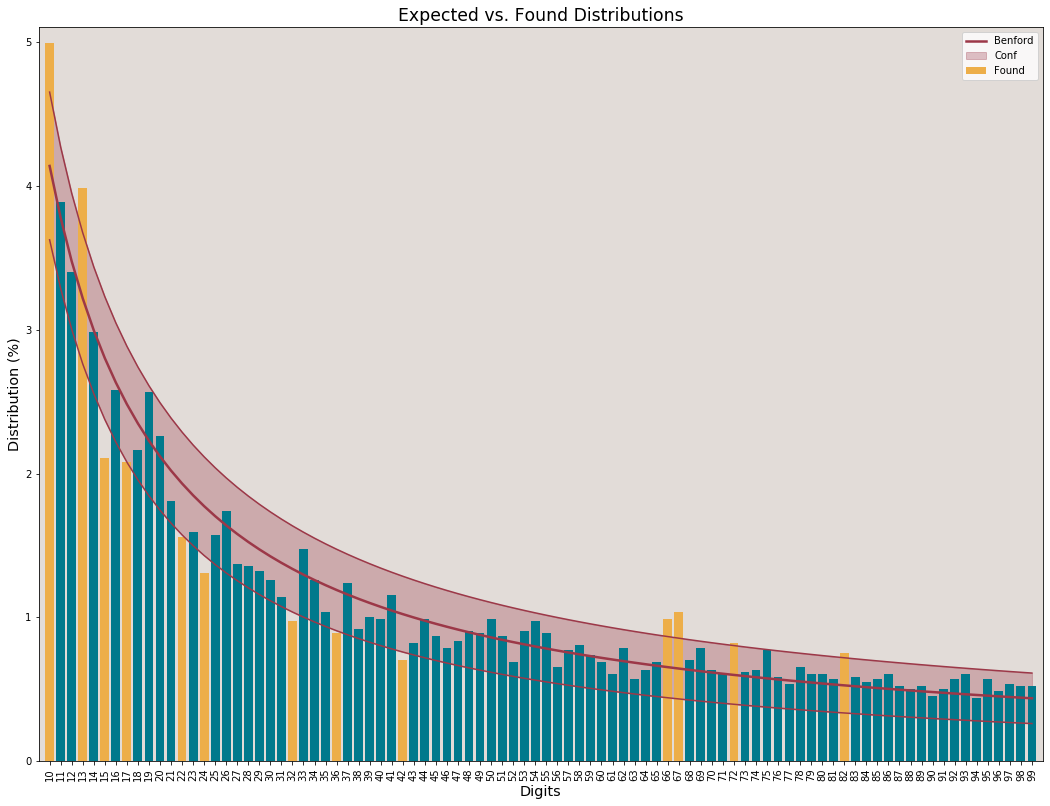

In [10]:
# For a significance of 5% (p <= 0.05), a confidence of 95%
f2d = bf.first_digits(sp.l_r, digs=2, decimals=8, confidence=95)

#### Some things happened:
- #### It printed a DataFrame with the **significant positive deviations**, in descending order of the Z scores. So, for a confidence level of 95%, the data to be considered for further investigation would be the records with First Two Digits **67**, **13**, **10**, **66**, **82** and **72**, whose propostions displayed a Z score higher than 1.96 (95%) **and** were positive, ie, were higher than the expected proportions. The function can also return **all** the relevant deviations or just the **negative** ones, by setting the `high-Z` parameter to 'all' or 'neg', respectively (see below).
- #### In the plot, it added upper and lower boundaries to the Benford Expected line based on the level of confidence. Accordingly, it changed the colors of the bars whose proportions fell lower or higher than the drawn boundaries, for better vizualization.

#### The *confidence* parameter takes the following (discrete) values other than *None*: 80, 85, 90, 95, 99, 99.9, 99.99, 99.999, 99.9999 and 99.99999.

#### When you set the confidence level, the resulting DataFrame gets one more column, with the Z scores (bellow).

In [11]:
f2d.head()

,Counts,Found,Expected,Z_score
First_2_Dig,,,,
67,62,0.010389,0.006434,3.740056
13,238,0.039879,0.032185,3.331418
10,298,0.049933,0.041393,3.279619
15,126,0.021113,0.028029,3.197832
66,59,0.009886,0.006531,3.137524


#### To get a feeling of a less compliant sample, let us try the SPY closing prices instead of its returns, now with a confidence level of 99%. 


Initialized sequence with 6026 registries.

Test performed on 6026 registries.
Discarded 0 records < 10 after preparation.

The entries with the significant positive deviations are:

             Expected     Found    Z_score
First_2_Dig                               
11           0.037789  0.135247  39.641478
13           0.032185  0.111185  34.710863
12           0.034762  0.115665  34.250363
14           0.029963  0.084965  25.006243
46           0.009340  0.030534  17.037044
20           0.021189  0.045636  13.132371
10           0.041393  0.074842  13.003059
45           0.009545  0.021739   9.668882
44           0.009760  0.019250   7.428122
21           0.020203  0.029705   5.196428
92           0.004695  0.008795   4.561719
90           0.004799  0.007634   3.090972
91           0.004746  0.007468   2.979729
94           0.004596  0.007136   2.819974
89           0.004853  0.007302   2.643275


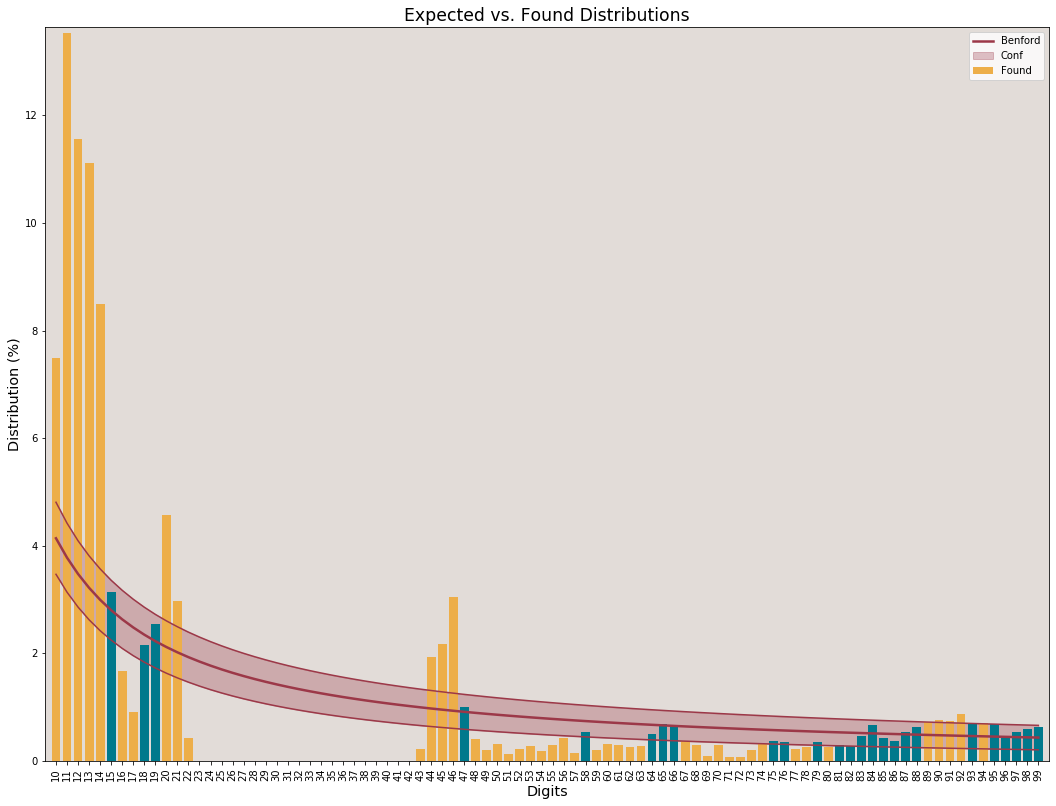

In [12]:
# Note the decimals=2 parameter instead of 8, since now we are dealing
# with two decimal places (price)
f2d = bf.first_digits(sp.Close, digs=2, decimals=2, confidence=99)

### Other digits tests and their Z scores 

#### We can do all this with the *First Three Digits*, *Second Digit* and the *Last Two Digits* tests too.


Initialized sequence with 5968 registries.

Test performed on 5968 registries.
Discarded 0 records < 100 after preparation.

The entries with the significant positive deviations are:

             Expected     Found   Z_score
First_3_Dig                              
952          0.000456  0.001676  4.110387
962          0.000451  0.001508  3.539604
997          0.000435  0.001340  3.041483
823          0.000527  0.001508  3.017908
695          0.000624  0.001676  2.991625
945          0.000459  0.001340  2.874850
139          0.003113  0.005194  2.769750
751          0.000578  0.001508  2.720614
874          0.000497  0.001340  2.635545
862          0.000504  0.001340  2.593616


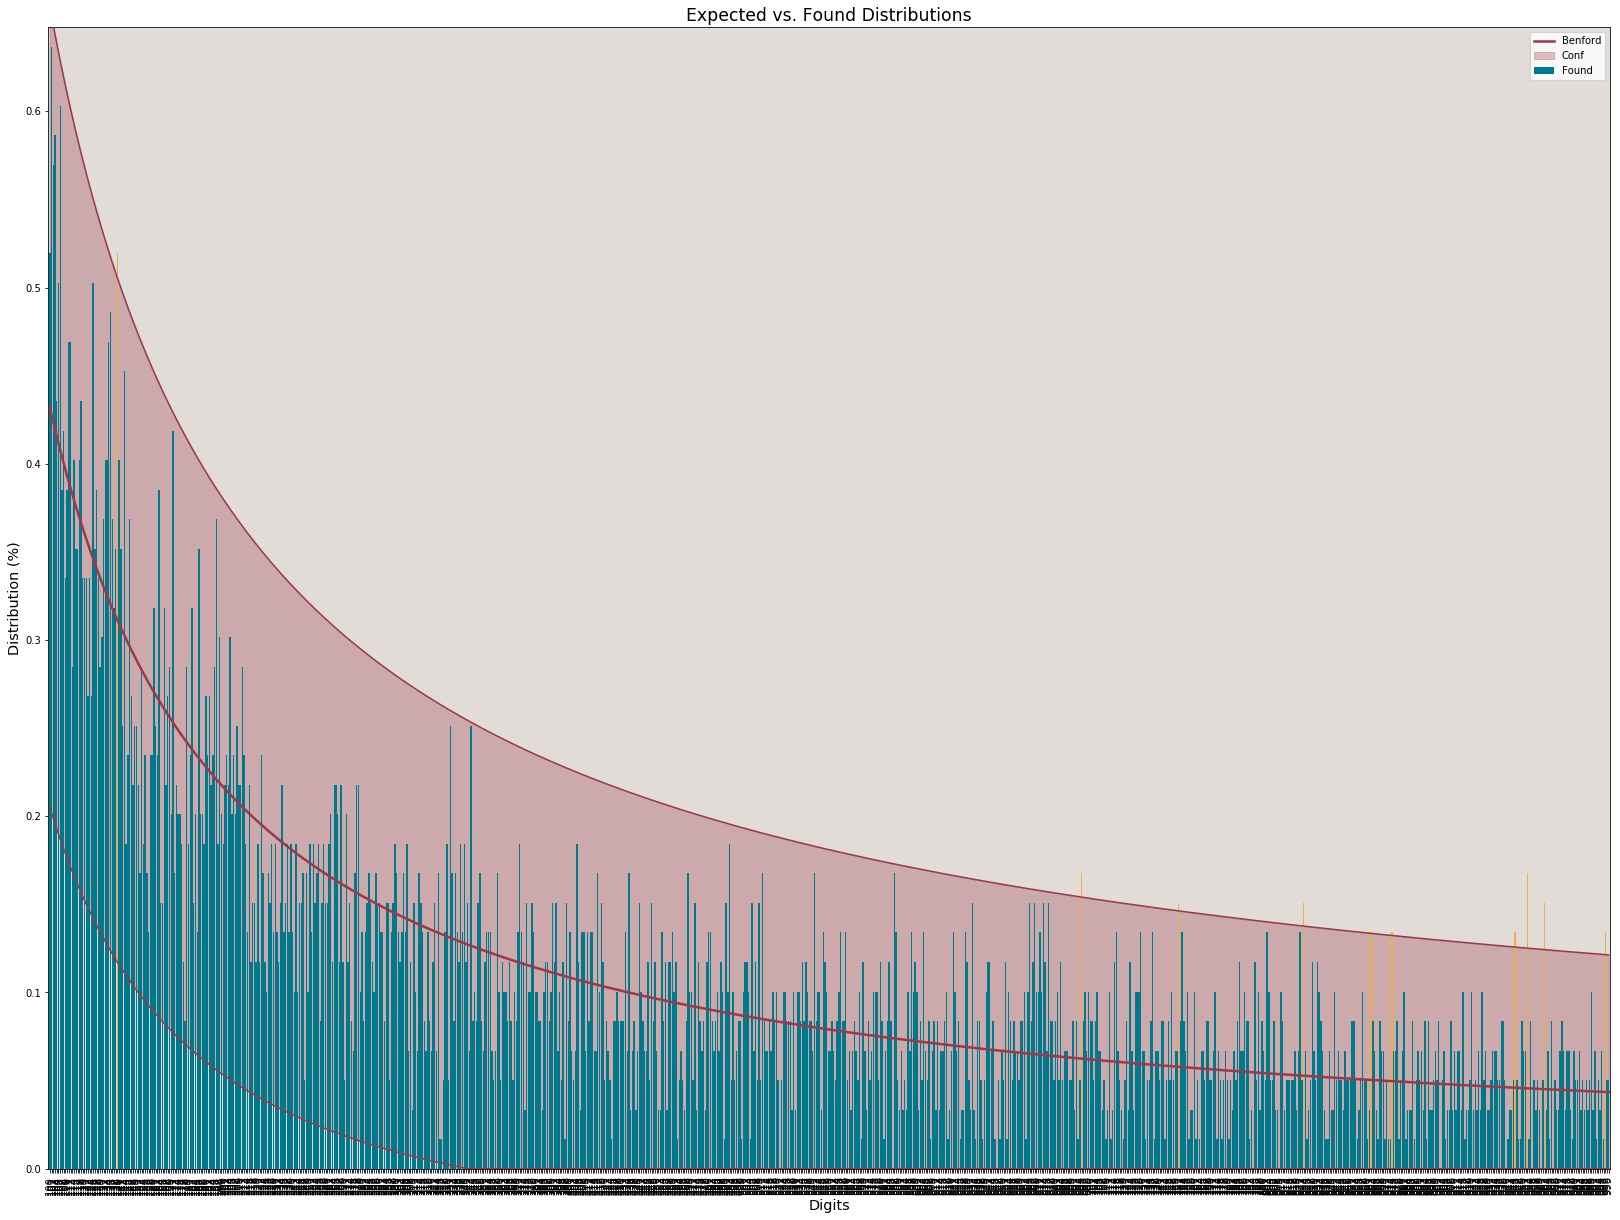

In [13]:
# First Three Digits Test, now with 99% confidence level
# digs=3 for the first three digits
f3d = bf.first_digits(sp.l_r, digs=3, decimals=8, confidence=99)

#### The First Three Digits plot is better seen and zoomed in and out without the inline plotting. Try `%matplotlib` jupyter magic to have it rendered in a separate window.

#### There are also the Second Digit and Last Two Digits tests, as shown bellow. These are implemented with separate (and accordingly named) functions with the same parametres but `digs`.


Initialized sequence with 5968 registries.

Test performed on 5968 registries.
Discarded 0 records < 10 after preparation.

The entries with the significant deviations are:

         Expected     Found   Z_score
Sec_Dig                              
0        0.119679  0.128686  2.123777
3        0.104330  0.111595  1.814980
2        0.108821  0.102547  1.535754
5        0.096677  0.090818  1.509872


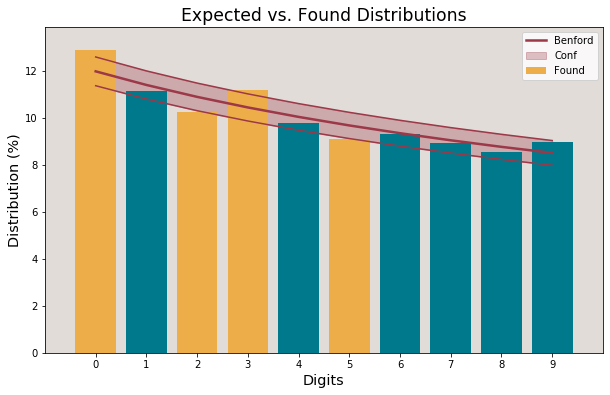

In [14]:
# Second Digit Test with confidence 85% and printing 'all' relevant deviations
sd = bf.second_digit(sp.l_r, decimals=8, confidence=85, high_Z='all')


Initialized sequence with 5968 registries.

Test performed on 5968 registries.

Discarded 0 records < 1000 after preparation

The entries with the significant negative deviations are:

            Expected     Found   Z_score
Last_2_Dig                              
25          0.010101  0.006032  3.078727
83          0.010101  0.007205  2.172566
12          0.010101  0.007373  2.043114
31          0.010101  0.007540  1.913662
55          0.010101  0.007708  1.784211
50          0.010101  0.007875  1.654759


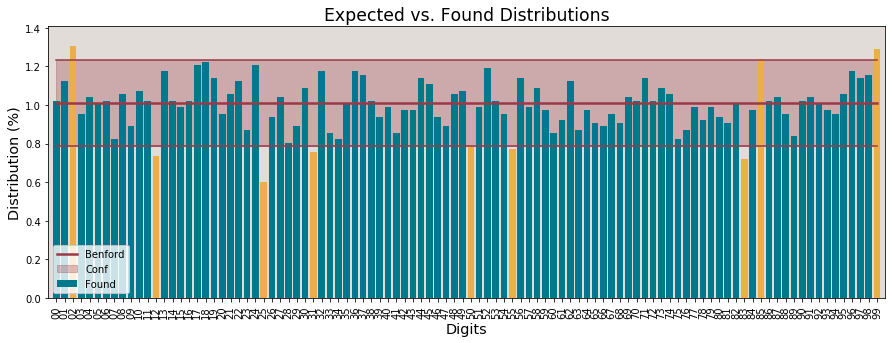

In [15]:
# Last Two Digits Test with confidence 90% and printing only the negative deviations
l2d = bf.last_two_digits(sp.l_r, decimals=8, confidence=90, high_Z='neg')

#### **Note**: The Last Two Digits test is not very useful in an irrational numbers cenario such as this (log returns).

### Remembering the Important Args:, and explaining some more
- #### `digs`: only used in the First Digits function, to tell it which test to run: 1- First Digits; 2- Fist Two Digits; and 3- First Three Digits.
- #### `decimals`: informs the number of decimal places to consider. Defaluts to 2, for currencies, but I set it to 8 here, since we are dealing with log returns (long floats). If the numbers are too small and you don't set it properly, you may have a division-by-zero error. If the sequence is of integers, set it to 0. You may also set it to *'infer'* if you don't know exactly or if the data has registries with different number of decimal places, and it will treat every registry separately (though with worse performance).
- #### `sign`: tells which portion of the data to consider. *'pos'*: only the positive entries; *'neg'*: only the negative ones; *'all'*: all entries but zeros. Defaults to *'all'*.
- #### `verbose`: gives information about the test during its run, like the number of registries analysed, the number of registries discarded according to each test (ie, < 10 for the First Digits), and shows the top Z scores of the resulting DataFrame if *confidence* is not None. Defaults to *True*.
- #### `high_Z`: chooses which Z scores to be used when displaying results, according to the set confidence level. Defaluts to *'pos'*, which will return only values higher than the expexted frequencies; *'neg'* will return only values lower than the expexted frequencies; *'all'* will return both extremes (positive and negative); and an integer will return the first n entries, positive and negative, regardless of whether Z is higher than the confidence or not.
- #### `limit_N`: sets a limit to the sample size for the calculation of the Z scores. This may be found useful if the sample is too big, due to the Z test power problem (More on this ahead). Defaults to None.
- #### `show_plot`: draws the test plot. Defaults to True. If *`confidence`* is not None, the plot will highlight the bars outside the lower and upper boundaries, regardless of the *`high_Z`* value.
- #### `MAD` and `MSE`: calculate, respectively, the Mean Absolute Deviation and the Mean Squared Error of the sample, for each test. Defaults to False. Both can be used inside the tests' functions or also separately, in their own functions, `mad()` and `mse()`.
- #### `chi_square`: computes the Chi Square test for the sample, taking into account the confidence level chosen.
- #### `KS`: computes the Kolmogorov-Smirnov test for the sample, taking into account the confidence level chosen.

### MAD

#### The Mean Absolute Deviation, or MAD, is, as the name states, the average of all absolute deviations (or errors, or residues) between the found proportions and the Benford's expected ones. 
#### <a href=www.sciencedirect.com/science/article/pii/S0748575100000087>Drake and Nigrini (2000)</a> developed this model, later revised by <a href=www.wiley.com/WileyCDA/WileyTitle/productCd-0470890460.html>Nigrini (2001)</a>, using empirical data to set limits of conformity for the First, First Two, First Three and Second Digits tests.
#### The MAD averages the proportions, so it is not directly influenced by the sample size. The lower the MAD, the better the confotmity.

In [16]:
mad1 = bf.mad(sp.l_r, test=1, decimals=8) # test=1 : MAD for the First Digits
mad1

0.008337279258069716

### Note that you must choose the *test* parameter, since there is one MAD for each test.
- #### First Digit: `1` or *'F1D'*;
- #### First Two Digits: `2` or *'F2D'*;
- #### First Three Digits: `3` or *'F3D'*;
- #### Second Digit: `22` or *'SD'*;
- #### Last Two Digits: `-2` or *'L2D'*;

In [17]:
mad2 = bf.mad(sp.l_r, test=2, decimals=8) # test=2 : MAD for the First Two Digits
mad2

0.001432048977662544

In [18]:
mad_sd = bf.mad(sp.l_r, test=22, decimals=8) # test=22 : MAD for the Second Digits
mad_sd

0.004150506450239337

#### Or you can set the *MAD* parameter to *True* when running the tests functions, and it will also give the corresponding conformity limits (as long as `verbose` is also True).

In [19]:
f2d = bf.first_digits(sp.l_r, digs=2, decimals=8, MAD=True, show_plot=False)


Initialized sequence with 5968 registries.

Test performed on 5968 registries.
Discarded 0 records < 10 after preparation.

The Mean Absolute Deviation is 0.001432048977662544
For the First Two Digits:
            - 0.0000 to 0.0012: Close Conformity
            - 0.0012 to 0.0018: Acceptable Conformity
            - 0.0018 to 0.0022: Marginally Acceptable Conformity
            - Above 0.0022: Nonconformity


In [20]:
sd = bf.second_digit(sp.l_r, decimals=8, MAD=True, show_plot=False)


Initialized sequence with 5968 registries.

Test performed on 5968 registries.
Discarded 0 records < 10 after preparation.

The Mean Absolute Deviation is 0.004150506450239337
For the Second Digits:
            - 0.0000 to 0.008: Close Conformity
            - 0.008 to 0.01: Acceptable Conformity
            - 0.01 to 0.012: Marginally Acceptable Conformity
            - Above 0.012: Nonconformity


#### Both the Chi Square and the Kolmogorov-Smirnov tests can be performed by setting the Args: `chi-square` and `KS` to True (default to False).


In [21]:
sd = bf.second_digit(sp.l_r, decimals=8, MAD=True, confidence=95,
                     chi_square=True, KS=True, show_plot=False)


Initialized sequence with 5968 registries.

Test performed on 5968 registries.
Discarded 0 records < 10 after preparation.

The entries with the significant positive deviations are:

         Expected     Found   Z_score
Sec_Dig                              
0        0.119679  0.128686  2.123777

The Mean Absolute Deviation is 0.004150506450239337
For the Second Digits:
            - 0.0000 to 0.008: Close Conformity
            - 0.008 to 0.01: Acceptable Conformity
            - 0.01 to 0.012: Marginally Acceptable Conformity
            - Above 0.012: Nonconformity

The Chi-square statistic is 13.9088.
Critical Chi-square for this series: 16.919.

The Kolmogorov-Smirnov statistic is 0.0090.
Critical K-S for this series: 0.0176


/home/milcent/anaconda3/lib/python3.7/site-packages/benford_py/benford/benford.py:854: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  verbose=self.verbose)
/home/milcent/anaconda3/lib/python3.7/site-packages/benford_py/benford/benford.py:858: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  verbose=self.verbose)


#### Values of the Chi Square and the Kolmogorov-Smirnov statistics lower than their respective critical values indicate conformity

## Mantissas

#### The mantissa is the decimal part of a logarithm. In a Benford data set, the mantissas of the registries' logs are uniformly distributed, such that, when ordered, they should form a straight line in the interval \[0,1), with slope 1/N, N being the sample size.
#### The closest the mantissas **mean**, **variance**, **skewness** and **kurtosis** are to the reference values, the more compliant with Benford's the sample is.
#### This can also be assessed visually:
- #### with the ordered mantissas plot, as closest the red dotted line is to the blue, reference one; and
- #### with the Arc Test plot ([PR-24 - thanks to @im-alexandre](https://github.com/milcent/benford_py/pull/24)), in whch a nicely compliant sample would have its mantissas, plotted by sine versus cosine, evenly distributed along a circle, with a Gravity Center as close to the origin as possible. 


 #################  Mantissas Test  #################

The Mantissas MEAN is      0.492058.	Ref: 0.5
The Mantissas VARIANCE is  0.089793.	Ref: 0.08333
The Mantissas SKEWNESS is  0.051333.	Ref: 0.0
The Mantissas KURTOSIS is  -1.280712.	Ref: -1.2



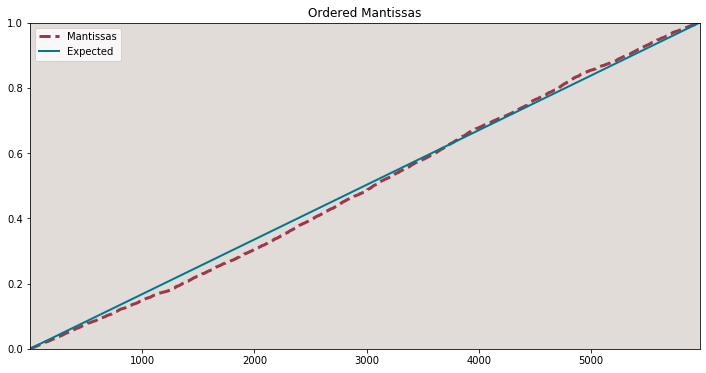

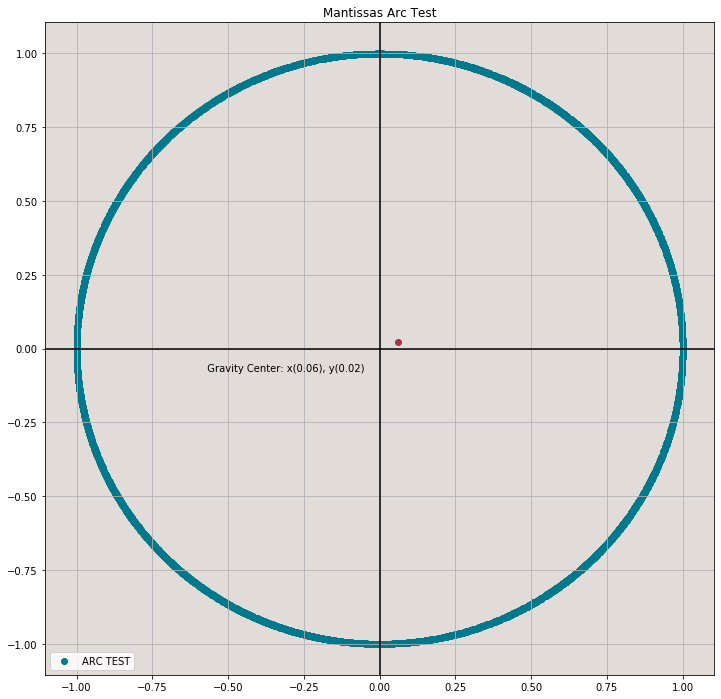

In [22]:
mant = bf.mantissas(sp.l_r)

#### The mantissas are accessed via the `Mantissa` column of the `data` DataFrame atribute of the variable.

In [23]:
mant.data.head()

,Mantissa,mant_x,mant_y
Date,,,
1993-02-01,0.149525,0.590196,0.807260
1993-02-02,0.674633,-0.456043,-0.889958
1993-02-03,0.978130,0.990574,-0.136982
1993-02-04,0.379305,-0.725972,0.687724
1993-02-05,0.157517,0.548933,0.835866


#### Let's now check how uniformly distributed are mantissas, this time with the `hist` method of the pandas DataFrame. (Maybe we eill implement it the future.)

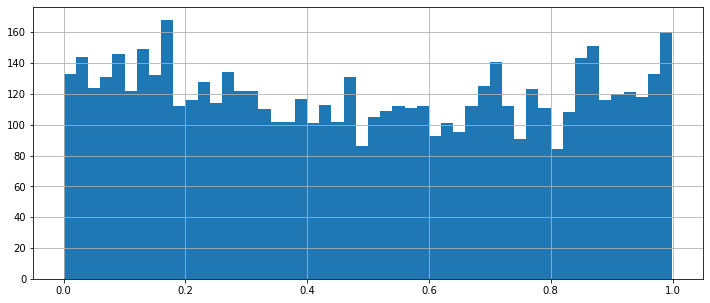

In [24]:
mant.data.Mantissa.hist(bins=50, figsize=(12,5));

#### Again, switching to the SPY closing prices for comparison


 #################  Mantissas Test  #################

The Mantissas MEAN is      0.341217.	Ref: 0.5
The Mantissas VARIANCE is  0.106994.	Ref: 0.08333
The Mantissas SKEWNESS is  0.873759.	Ref: 0.0
The Mantissas KURTOSIS is  -0.846793.	Ref: -1.2



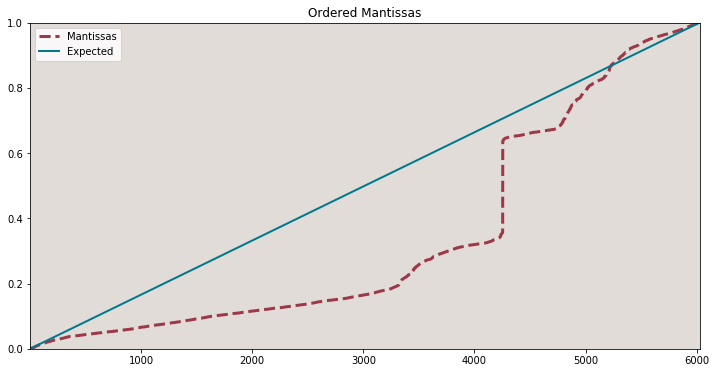

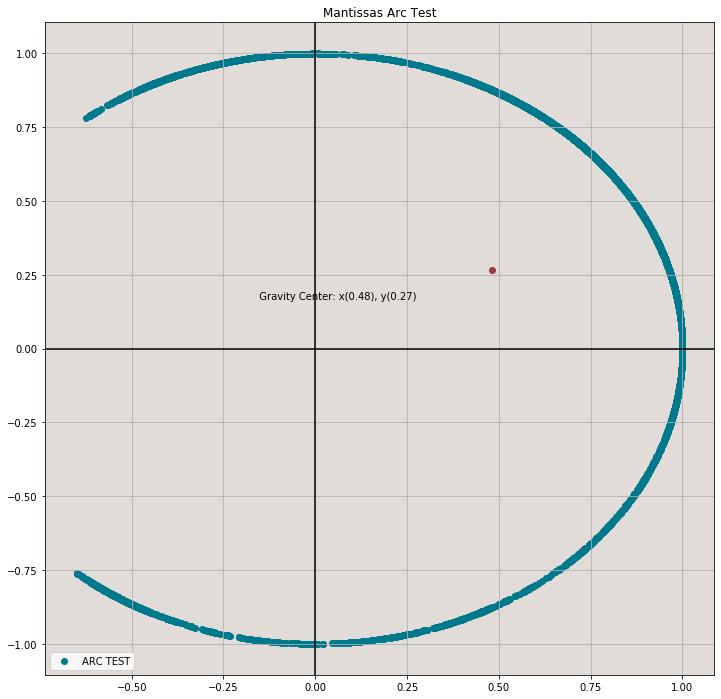

In [25]:
mant_close = bf.mantissas(sp.Close, report=True, show_plot=True)

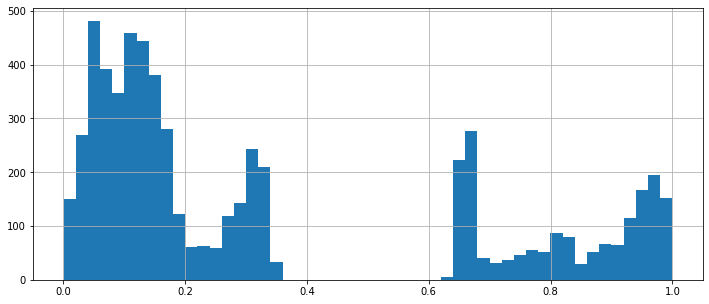

In [26]:
mant_close.data.Mantissa.hist(bins=50, figsize=(12,5));

## Benford Class

#### The tests' fnctions already make use of especial classes under the hood when processing the ingested data (bf.Source, bf.Mantissas...).
#### The Benford Class came form the need of having an object instance that would comprise all we needed, from the original `data`, to the pre-processed `base`, to all the possible `tests`, along with their respective statistics, and independent, updatable confidence levels and critical values. All this is accessible via the Benford instance atributes or methods.
#### See Figure Bellow:

![Benford Instance]("https://github.com/milcent/benford_py/blob/master/img/Benford_Instance.png")

#### The call to the Benford class accepts data for ingestion in two ways:
- #### A pandas Series or numpy array, just like the functions; and
- #### A tuple, whose first element is a DataFrame and the second is a string with the name of the column that contains the records to be analyzed (example bellow).

In [27]:
benf = bf.Benford((sp, 'l_r'), decimals=8)


 ########## Benford Object Instantiated ########### 

Initial sample size: 6026.

Test performed on 5968 registries.

Number of discarded entries for each test:
{'F1D': 0, 'F2D': 0, 'F3D': 0, 'SD': 0, 'L2D': 0}


#### There is no need to set the `digs` parameter or to appoint a specific test to be run. The call automatically runs the First Digit, Second Digit, First Two Digits, First Three Digits and Last Two Digits tests, along with all stats, and appends them as attributes of the Benford instance.

In [28]:
type(benf)

benford.benford.Benford

#### The attribute `tests` holds a list of the tests run.

In [29]:
benf.tests # returns a list will all tests

['F1D', 'F2D', 'F3D', 'SD', 'L2D']

#### The attribute `data` is nothing but the raw input data

In [30]:
benf.data.head() # The raw input DataFrame now lives inside the Benford instance too

,Open,High,Low,Close,Volume,Adj_Close,p_r,l_r
Date,,,,,,,,
1993-01-29,43.9687,43.9687,43.7500,43.9375,1003200,28.000838,NaN,NaN
1993-02-01,43.9687,44.2500,43.9687,44.2500,480500,28.199990,0.007112,0.007087
1993-02-02,44.2187,44.3750,44.1250,44.3437,201300,28.259704,0.002118,0.002115
1993-02-03,44.4062,44.8437,44.3750,44.8125,529400,28.558465,0.010572,0.010516
1993-02-04,44.9687,45.0937,44.4687,45.0000,531500,28.677956,0.004184,0.004175


#### The `base` object has the pre-processed data, with:
- #### `Seq`: the sequence of records chosen to be analyzed;\
- #### `ZN`: the records transformed (multiplies) according to the `decimals` parameter;
- #### `F1D`: the records first digits;
- #### `F2D`: the records first two digits;
- #### `F3D`: the records first three digits;
- #### `SD`: the records second digits; and
- #### `L2D`: the records last two digits.

In [31]:
benf.base.head()

,Seq,ZN,F1D,F2D,F3D,SD,L2D
Date,,,,,,,
1993-02-01,0.007087,708720,7,70,708,0,20
1993-02-02,0.002115,211527,2,21,211,1,27
1993-02-03,0.010516,1051647,1,10,105,0,47
1993-02-04,0.004175,417537,4,41,417,1,37
1993-02-05,-0.000696,69579,6,69,695,9,79


#### Once we have the tests we want, we can use their `report` method to get the information we need.


 ###############  First Digit Test  ############### 

Mean Absolute Deviation: 0.008337
0.006000 < MAD <= 0.012000: Acceptable conformity.

For confidence level 95%: 

	Kolmogorov-Smirnov: 0.031075 
	Critical value: 0.017605 -- FAIL

	Chi square: 43.563426 
	Critical value: 15.507000 -- FAIL

	Critical Z-score:1.96.

The entries with the significant positive deviations are:

             Expected     Found   Z_score
First_1_Dig                              
6            0.066947  0.074899  2.432260
8            0.051153  0.057808  2.304522
9            0.045757  0.051944  2.256091
7            0.057992  0.064678  2.182305


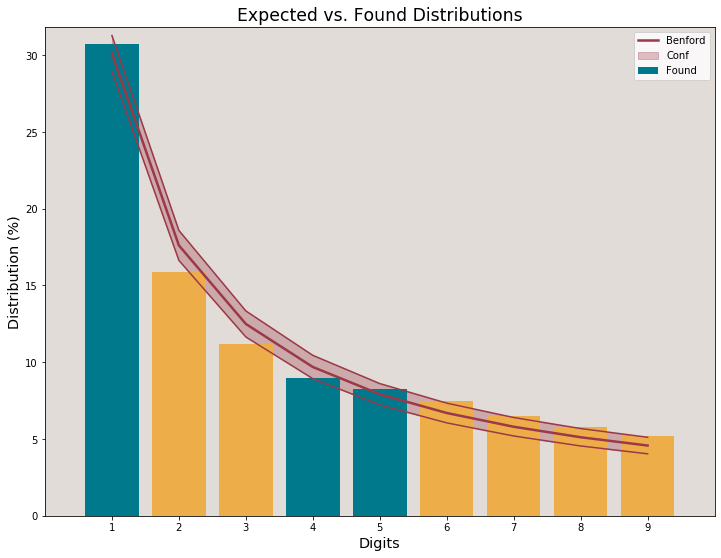

In [32]:
benf.F1D.report()


 ############  First Two Digits Test  ############# 

Mean Absolute Deviation: 0.001432
0.001200 < MAD <= 0.001800: Acceptable conformity.

For confidence level 95%: 

	Kolmogorov-Smirnov: 0.031275 
	Critical value: 0.017605 -- FAIL

	Chi square: 158.705636 
	Critical value: 112.022000 -- FAIL

	Critical Z-score:1.96.

The entries with the significant positive deviations are:

             Expected     Found   Z_score
First_2_Dig                              
67           0.006434  0.010389  3.740056
13           0.032185  0.039879  3.331418
10           0.041393  0.049933  3.279619
66           0.006531  0.009886  3.137524
82           0.005264  0.007540  2.340301
72           0.005990  0.008210  2.138736


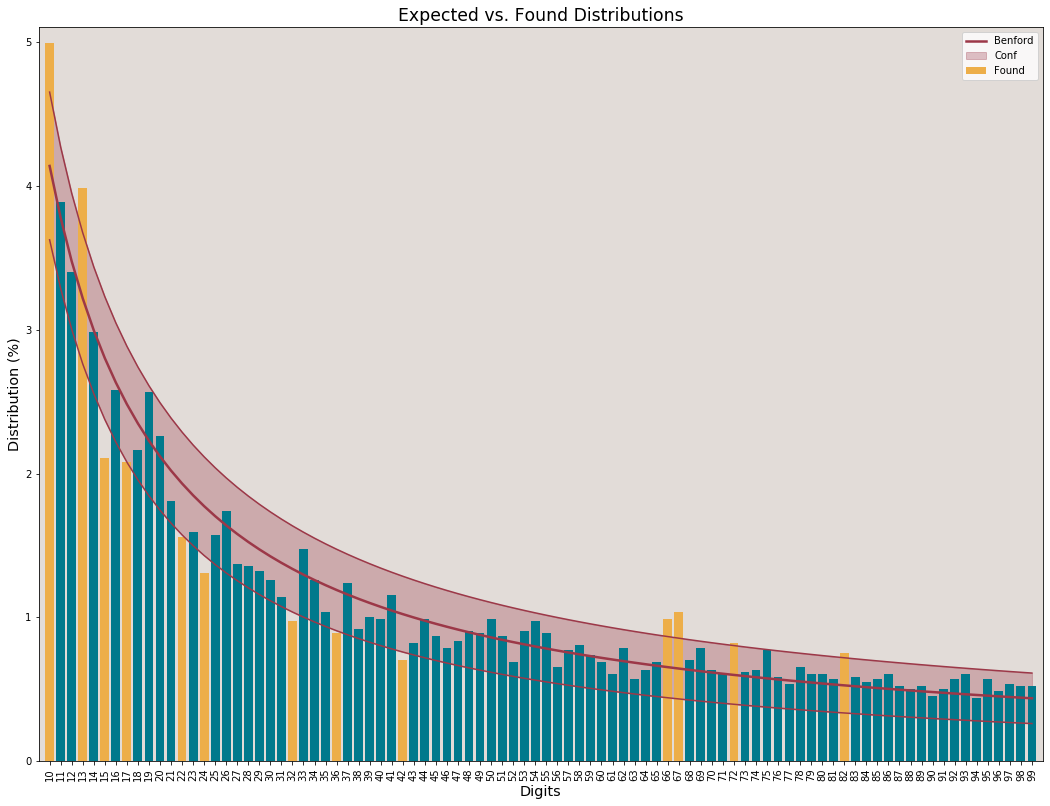

In [33]:
benf.F2D.report()

#### Now this may be a good time to discuss the *Power Problem*.
#### Such a problem affects the tests that use the sample size in their computations. These tests become too "nervous" when the sample is large, and mey render false positives. It is the case with the Z scores, as well as the Chi-square and the Kolmogorov-smirnov tests.
#### To circunvene this issue, one may increase the confidence level, that is, choosing a lower p-value, making it harder for it to reject the null hipothesis (conformity).
#### The Benford class has an `update_confidence` method that allows changing the confidence/significance level, without having to ingest and pre-process the data all over again.

In [34]:
benf.update_confidence(99.999, tests=['F2D', 'L2D'])

#### As can be seen, this method can update the confidence level just for a part of the tests or, if the `tests` parameter is left unassigned (defaults to None), it will update all.
#### The confidence of all tests can be recovered by the `all_confidences` attribute.

In [35]:
benf.all_confidences # Note different values for F2D and L2D

{'F1D': 95, 'F2D': 99.999, 'F3D': 95, 'SD': 95, 'L2D': 99.999}

#### Now let's check the same test, with the updated confidence


 ############  First Two Digits Test  ############# 

Mean Absolute Deviation: 0.001432
0.001200 < MAD <= 0.001800: Acceptable conformity.

For confidence level 99.999%: 

	Kolmogorov-Smirnov: 0.031275 
	Critical value: 0.031973 -- PASS

	Chi square: 158.705636 
	Critical value: 157.702000 -- FAIL

	Critical Z-score:4.417.

The entries with the significant positive deviations are:

Empty DataFrame
Columns: [Expected, Found, Z_score]
Index: []


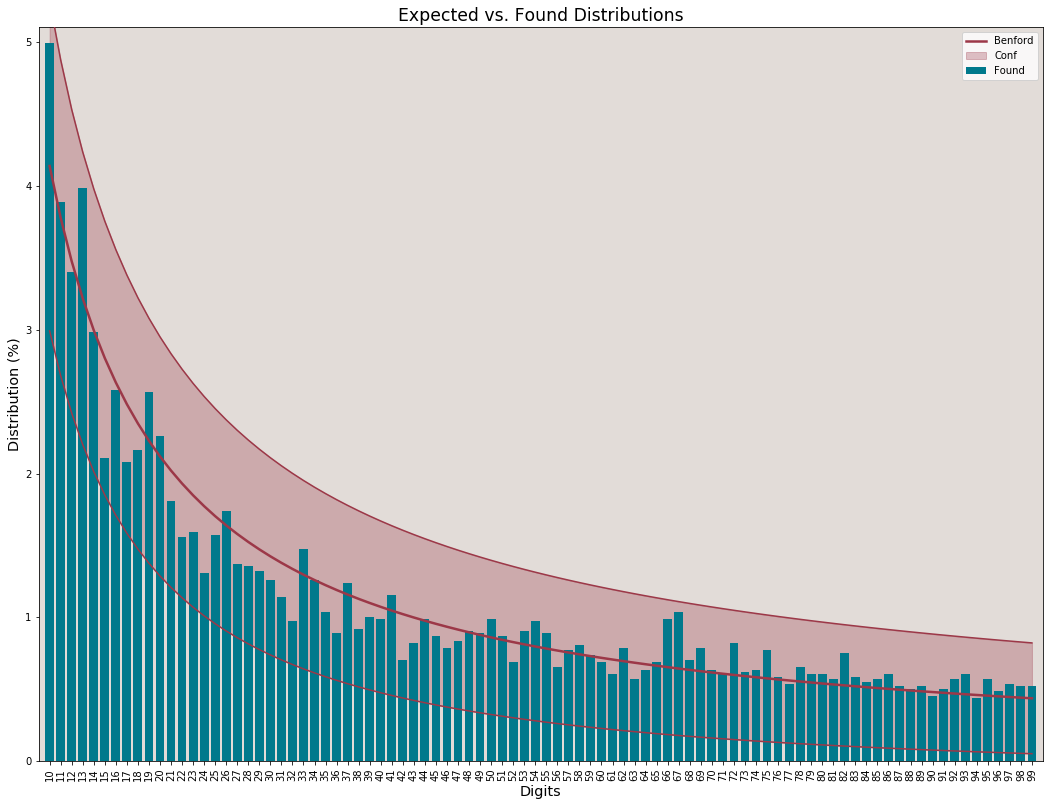

In [36]:
benf.F2D.report()


 ###############  First Digit Test  ############### 

Mean Absolute Deviation: 0.008337
0.006000 < MAD <= 0.012000: Acceptable conformity.

For confidence level 95%: 

	Kolmogorov-Smirnov: 0.031075 
	Critical value: 0.017605 -- FAIL

	Chi square: 43.563426 
	Critical value: 15.507000 -- FAIL

	Critical Z-score:1.96.

The entries with the significant positive deviations are:

             Expected     Found   Z_score
First_1_Dig                              
6            0.066947  0.074899  2.432260
8            0.051153  0.057808  2.304522
9            0.045757  0.051944  2.256091
7            0.057992  0.064678  2.182305


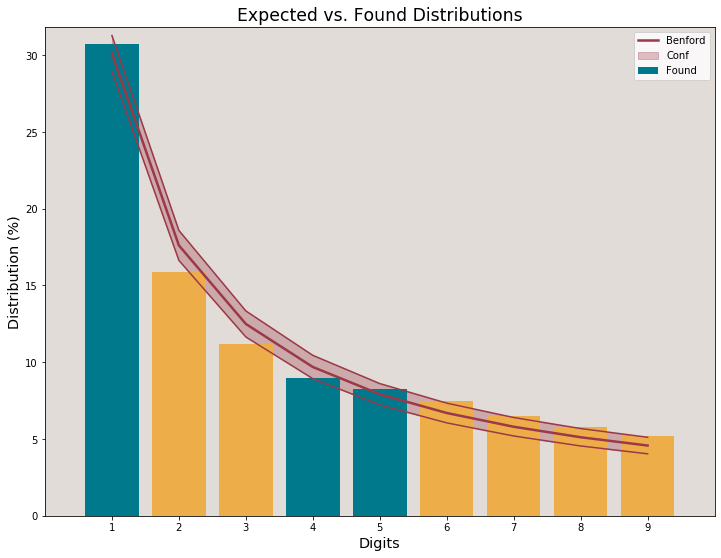

In [37]:
benf.F1D.report() # Note that th confidence remains at 95%


 ##############  Second Digit Test  ############### 

Mean Absolute Deviation: 0.004151
MAD <= 0.008000: Close conformity.

For confidence level 95%: 

	Kolmogorov-Smirnov: 0.009007 
	Critical value: 0.017605 -- PASS

	Chi square: 13.908828 
	Critical value: 16.919000 -- PASS

	Critical Z-score:1.96.

The entries with the significant positive deviations are:

         Expected     Found   Z_score
Sec_Dig                              
0        0.119679  0.128686  2.123777


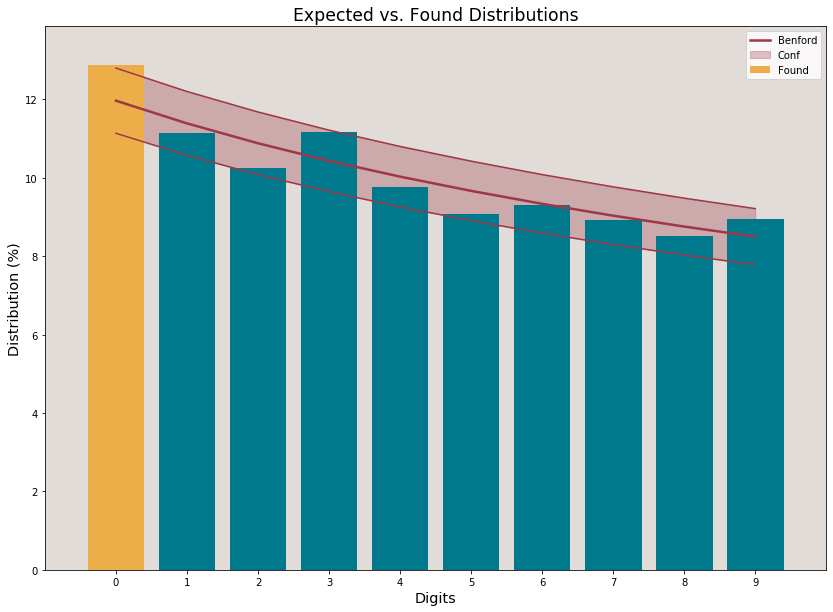

In [38]:
benf.SD.report()


 #############  Last Two Digits Test  ############# 

Mean Absolute Deviation: 0.000997
There is no conformity check for this test's MAD.

For confidence level 99.999%: 

	Kolmogorov-Smirnov: 0.017739 
	Critical value: 0.031973 -- PASS

	Chi square: 98.139062 
	Critical value: 170.798000 -- PASS

	Critical Z-score:4.417.

The entries with the significant positive deviations are:

Empty DataFrame
Columns: [Expected, Found, Z_score]
Index: []


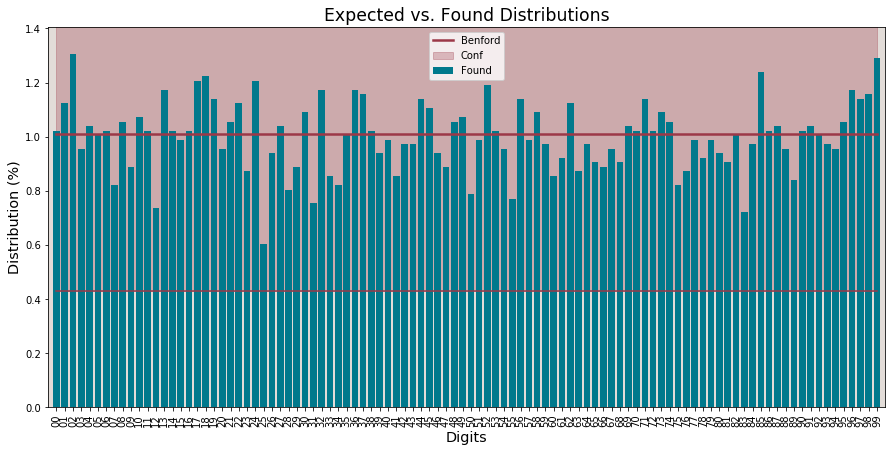

In [39]:
benf.L2D.report()

#### The power problem can alsso be addressed by setting an arbitrarily lower **"N"** for the computations. This artificial sample size makes the tests more robust. Nigrini has proposed a size no larger than 2,500.
#### This can be enforced by setting the parameter `lmimit_N` when calling the Benford class. Unfortunately, it is not yet implemented to be dinamically an independently update such as the confidence level.

In [40]:
benf = bf.Benford((sp, 'l_r'), decimals=8, limit_N=1800)


 ########## Benford Object Instantiated ########### 

Initial sample size: 6026.

Test performed on 5968 registries.

Number of discarded entries for each test:
{'F1D': 0, 'F2D': 0, 'F3D': 0, 'SD': 0, 'L2D': 0}


In [41]:
benf.all_confidences

{'F1D': 95, 'F2D': 95, 'F3D': 95, 'SD': 95, 'L2D': 95}


 ############  First Two Digits Test  ############# 

Mean Absolute Deviation: 0.001432
0.001200 < MAD <= 0.001800: Acceptable conformity.

For confidence level 95%: 

	Kolmogorov-Smirnov: 0.031275 
	Critical value: 0.032056 -- PASS

	Chi square: 158.705636 
	Critical value: 112.022000 -- FAIL

	Critical Z-score:1.96.

The entries with the significant positive deviations are:

Empty DataFrame
Columns: [Expected, Found, Z_score]
Index: []


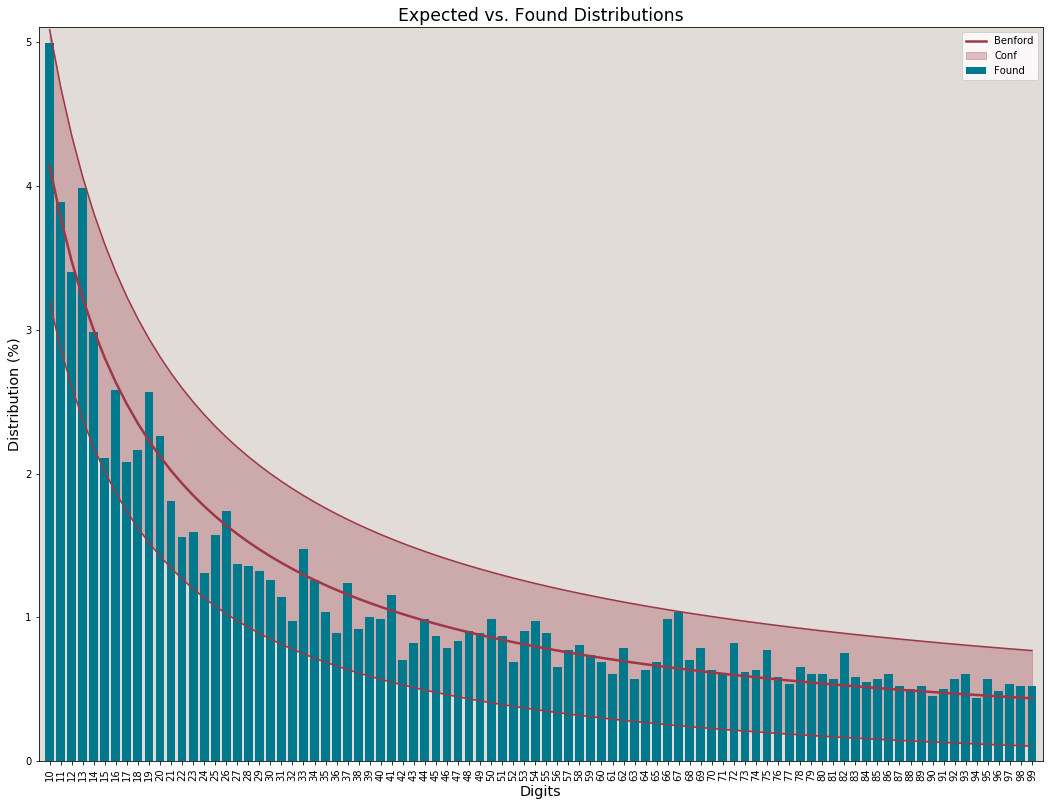

In [42]:
benf.F2D.report()

#### Note the improvement of the Z scores and the Kolmogorov-Smirnov tests, which are affected by sample size

## Other digits tests

#### There are other tests that can be performed and checked for conformity. These are the Summation Tests and the Second Order Tests. Although we will leave their explanation for some other time, they are already implemented in the Benford class, and can be added with calls to the `summation` and `sec_order` methods, or at instantiation, by setting the Args: `summation` and `sec_order` to True

In [43]:
benf.summation()


Added Summation DataFrames to F1D, F2D and F3D Tests.


In [44]:
benf.sec_order()


Second order tests run in 5931 registries.

Number of discarded entries for second order tests:
{'F1D_sec': 17, 'F2D_sec': 110, 'F3D_sec': 997, 'SD_sec': 110, 'L2D_sec': 4411}


In [45]:
benf.tests

['F1D',
 'F2D',
 'F3D',
 'SD',
 'L2D',
 'F1D_Summ',
 'F2D_Summ',
 'F3D_Summ',
 'F1D_sec',
 'F2D_sec',
 'F3D_sec',
 'SD_sec',
 'L2D_sec']

In [46]:
benf.all_confidences

{'F1D': 95,
 'F2D': 95,
 'F3D': 95,
 'SD': 95,
 'L2D': 95,
 'F1D_Summ': None,
 'F2D_Summ': None,
 'F3D_Summ': None,
 'F1D_sec': 95,
 'F2D_sec': 95,
 'F3D_sec': 95,
 'SD_sec': 95,
 'L2D_sec': 95}

### That's it for now.
### If you have a data set that you think would be nice to study with Benford tests, share it and we can post a notebook with all tests and comments.
### Thanks
### Milcent